In [3]:
import pandas as pd
df = pd.read_csv("gait.csv")
print(df.shape)


(181800, 7)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Accuracy: 0.3751

🔍 Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.46      0.41     12029
           2       0.44      0.04      0.08     12176
           3       0.38      0.62      0.47     12155

    accuracy                           0.38     36360
   macro avg       0.39      0.38      0.32     36360
weighted avg       0.39      0.38      0.32     36360

🧩 Confusion Matrix:
 [[5580  431 6018]
 [5541  508 6127]
 [4376  227 7552]]


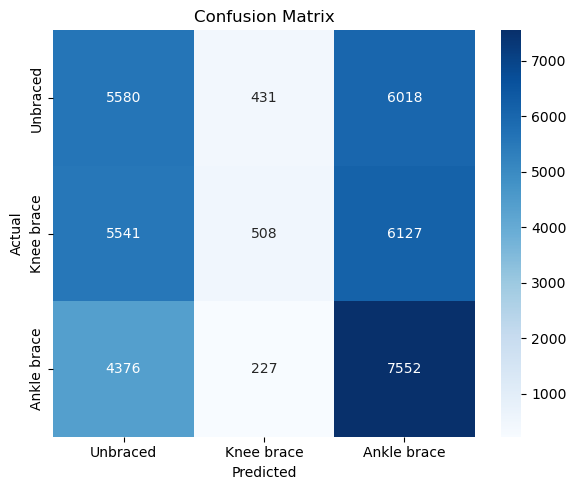

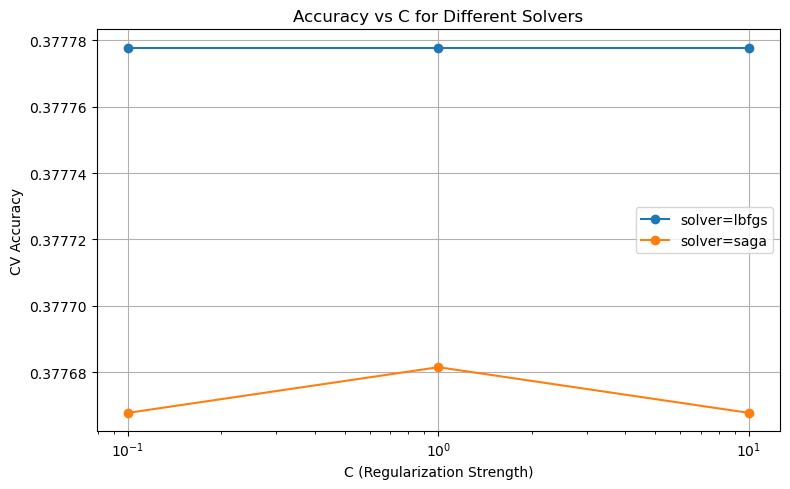

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("gait.csv")  # Replace with your actual file path

# Step 2: Define input features and target
features = ['subject', 'replication', 'leg', 'joint', 'angle']
X = df[features]
y = df['condition']  # Target is now 'condition'

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Logistic Regression with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['multinomial']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Step 6: Best model and predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Step 7: Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}\n")
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=["Unbraced", "Knee brace", "Ankle brace"],
            yticklabels=["Unbraced", "Knee brace", "Ankle brace"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 9: Plot Accuracy for different 'C' values
results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(8, 5))
for solver in results['param_solver'].unique():
    subset = results[results['param_solver'] == solver]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f"solver={solver}")

plt.xscale('log')
plt.title("Accuracy vs C for Different Solvers")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("CV Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("gait.csv")  # Replace with your actual file path

# Step 2: Define input features and target
features = ['subject', 'replication', 'leg', 'joint', 'angle']
X = df[features]
y = df['condition']  # Target is now 'condition'

# Step 3: Feature scaling (optional but can help with certain models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Random Forest with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Step 6: Best model and predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Step 7: Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}\n")
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=["Unbraced", "Knee brace", "Ankle brace"],
            yticklabels=["Unbraced", "Knee brace", "Ankle brace"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 9: Plot Accuracy for different n_estimators
results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(8, 5))
for max_depth in results['param_max_depth'].unique():
    subset = results[results['param_max_depth'] == max_depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], marker='o', label=f"max_depth={max_depth}")

plt.title("Accuracy vs n_estimators for Different Max Depths")
plt.xlabel("n_estimators")
plt.ylabel("CV Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 162 candidates, totalling 486 fits


KeyboardInterrupt: 